# Applied Statistics Project

**Francesco Troja**

***

### Table of Contents
1. [Python Libraries](#Python_Libraries)
2. [Problem Statement](#problem_statement)
3. [Introduction](#Introduction)
4. [Importing the Dataset](#Importing_the_Dataset)
5. [Exploratory Data Analysis ](#eda)
    - [5.1 Data Overview](#data_overview)
    - [5.2 Data Cleaning](#data_cleaning)
    - [5.3 Summary Statistics](#summary_statistics)
    - [5.4 Data Distribution](#data_distribution)

### 1. Python Libraries <a class="anchor" id="Python_Libraries"></a>

This notebook utilizes a selection of Python libraries, each chosen for its specific functionalities and capabilities to address the diverse needs of the project. These libraries were carefully selected to ensure the successful execution of the project, aligning with the project’s objectives and technical requirements.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### 2. Problem Statement <a class="anchor" id="problem_statement"></a>

> In this project, you will analyze the PlantGrowth R dataset. You will find a short description of it on Vicent Arel-Bundock's Rdatasets page. The dataset contains two main variables, a treatment group and the weight of plants within those groups. Your task is to perform t-tests and ANOVA on this dataset while describing the dataset and explaining your work. In doing this you should:
>1. Download and save the dataset to your repository.
>2. Describe the data set in your notebook.
>3. Describe what a t-test is, how it works, and what the assumptions are.
>4. Perform a t-test to determine whether there is a significant difference between the two treatment groups trt1 and trt2.
>5. Perform ANOVA to determine whether there is a significant difference between the three treatment groups ctrl, trt1, and trt2.
>6. Explain why it is more appropriate to apply ANOVA rather than several t-tests when analyzing more than two groups.

### 3. Introduction <a class="anchor" id="Introduction"></a>

The **PlantGrowth dataset** originates from an experiment aimed at *evaluating the effects of different conditions on plant yields*, specifically *measuring the dried weight of plants*. The dataset comprises observations from three groups: a **control group** and **two treatment groups**, each containing *ten plants*. To ensure fairness and reduce variability, the experiment employed genetically similar seeds, which were randomly assigned to either a nutritionally enriched environment (treatment groups) or standard growing conditions (control group). This setup reflects a completely randomized experimental design. Following a set growing period, the plants were harvested, dried, and weighed, with their weights recorded in grams. The dataset offers a valuable resource for analyzing and comparing the impact of nutritional enhancements on plant growth, serving as a foundational tool for studying treatment efficacy in controlled agricultural experiments $^1$.

### 4. Importing the Dataset <a class="anchor" id="Importing_the_Dataset"></a>

The **PlantGrowth dataset** has been downloaded and imported into the repository from [Vincent Arel-Bundock's Rdatasets's](https://vincentarelbundock.github.io/Rdatasets/articles/data.html) Rdatasets page, which offers a curated collection of various datasets in CSV format.

To begin the project, the first step is to **import the dataset*. The most efficient Python library for importing and analyzing datasets is *pandas*. This library offers an array of tools for handling, manipulating, and analyzing data. In this case, the *dataset* is stored in a CSV file, and the most efficient way to work with such files is by utilizing the `read_csv()` function from the Pandas library. This function allows for easy importation of CSV files into a Pandas DataFrame, a versatile structure that simplifies data exploration, manipulation, and analysis. To import the file, the file path is provided as an argument, which specifies the file's location on the system. The `read_csv()` function then reads the data from the specified file and loads it into a DataFrame, making it ready for further processing and analysis $^2$.

In [2]:
# read the csv file
df = pd.read_csv('PlantGrowth.csv')
print("Original DataFrame:")
df

Original DataFrame:


,rownames,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl
5,6,4.61,ctrl
6,7,5.17,ctrl
7,8,4.53,ctrl
8,9,5.33,ctrl
9,10,5.14,ctrl


Once the dataset is imported and displayed, it is apparent that the **PlantGrowth dataset** consists of a *small sample size of just 30 entries*. Typically, in pandas, the `head()` and `tail()` functions are available to preview the first and last 5 rows of the dataset by default. However, given the small size of this dataset, it's not necessary to use these functions. A quick glance at the dataset structure reveals *three variables*: **rownames**, **weight**, and **group**.

### 5. Exploratory Data Analysis <a class="anchor" id="eda"></a>

This section will focus on conducting Exploratory Data Analysis (EDA), a crucial initial step in the data analysis process. EDA helps us gain a comprehensive understanding of the dataset, uncovering patterns and relationships that can guide subsequent analysis and decision-making. By thoroughly examining the data, we can identify key trends, detect anomalies, and generate valuable insights. Additionally, this step is instrumental in determining the appropriate type of hypothesis tests to perform, ensuring that our statistical evaluations align with the characteristics of the data.

#### 5.1 Data Overview <a class="anchor" id="data_overview"></a>

We begin our Exploratory Data Analysis by examining the dataset's structure and fundamental characteristics. To achieve this, we will utilize **Pandas functions** such as [`info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html), [`shape`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html), and [`nunique()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nunique.html). These tools provide critical insights, including an overview of the dataset's structure, the total number of entries and features, the data types of each column, and the count of unique values per column $^3$.

In [3]:
# def function to analyse dataset structure
def data_overview(data):
    print("Dataset Information:")
    data.info()
    print("\nDataset Shape:")
    print(f"Rows: {data.shape[0]}, Columns: {data.shape[1]}")
    print("\nUnique Values per Column:")
    print(data.nunique())

data_overview(df)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  30 non-null     int64  
 1   weight    30 non-null     float64
 2   group     30 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 848.0+ bytes

Dataset Shape:
Rows: 30, Columns: 3

Unique Values per Column:
rownames    30
weight      29
group        3
dtype: int64


Our dataset consists of **30 rows** and **3 columns**: *rownames*, *weight*, and *group*. Importantly, the dataset contains no missing values, meaning we can analyze it directly without needing to address gaps or impute data. The columns can be categorized into two types of variables:

- **Discrete/Continuous variables**: This includes rownames and weight.
- **Categorical variables**: This is represented by the group column.

The distinction between these variable types lies in how they are measured and used in analysis. **Continuous variables**, are *numeric* and allow for *arithmetic operations* such as addition or averaging. On the other hand, **categorical variables**, are *qualitative* and used to *categorize* or *label data points without implying any numerical relationship between categories* $^4$.

This distinct separation of variables plays a crucial role in guiding the selection of appropriate statistical methods and visualization techniques for effective analysis. 

#### 5.2 Data Cleaning <a class="anchor" id="data_cleaning"></a>

At a preliminary analysis, our dataset does not appear to contain any missing values. To confirm this observation, we can utilize the Pandas method [`isnull()`](https://pandas.pydata.org/docs/reference/api/pandas.isnull.html), which identifies missing values within the dataset.

In [4]:
# Summarizes missing values for each column
df.isnull().sum()

rownames    0
weight      0
group       0
dtype: int64

Let’s evaluate whether all the columns in our dataset are necessary for the analysis or if some can be excluded without affecting the results. Among the three columns, one stands out as non-essential: the rownames column. This column merely serves as an additional index, listing all the values in the dataset without providing any meaningful contribution to the analysis. Therefore, it can be safely removed. To accomplish this, we will use the drop() function to eliminate the rownames column from the dataset.

In [5]:
# Remove the `rownames` column
df.drop(columns=['rownames'], inplace=True)

# print the first 5 row
display(df.head())

,weight,group
0,4.17,ctrl
1,5.58,ctrl
2,5.18,ctrl
3,6.11,ctrl
4,4.50,ctrl


#### 5.3 Summary Statistics <a class="anchor" id="summary_statistics"></a>

In this section, we will explore the [`describe`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) function, a key tool for Exploratory Data Analysis and statistical assessment. This function plays a crucial role in quickly summarizing the key attributes of a dataset, serving as an initial step to identify patterns and potential areas for deeper investigation. The `describe` function generates a comprehensive set of **summary statistics** for numerical columns, including the **mean**, **standard deviation**, **minimum**, **maximum**, and **quartiles** (25th, 50th, and 75th percentiles). These metrics provide valuable insights into the central tendency, variability, and overall distribution of the data. By examining these summaries, analysts can quickly detect trends, anomalies, or inconsistencies that may warrant further analysis, making the describe function an indispensable tool in the early stages of data exploration $^5$.

In [6]:
print("Summary statistics of the Continuous Variable:")
df.describe()

Summary statistics of the Continuous Variable:


,weight
count,30.000000
mean,5.073000
std,0.701192
min,3.590000
25%,4.550000
50%,5.155000
75%,5.530000
max,6.310000


The first inconsistency becomes evident when we revisit the introduction of the PlantGrowth dataset, which was designed to evaluate the effects on plant yields by measuring plant weights. The dataset is categorized into three distinct groups, each representing different experimental conditions. However, the summary statistics provided above is related to the entire plant population without accounting for the group divisions. To better understand the data, let us split the dataset into its three groups and generate separate statistical summaries for each. This approach will allow us to examine the differences between groups more accurately.

In [7]:
# create subsets of groups
ctrl = df[df['group'] == 'ctrl']
trt1 = df[df['group'] == 'trt1']
trt2 = df[df['group'] == 'trt2']

In [8]:
# Combine the groups into a dictionary for easier looping
groups = {'Control': ctrl, 'Treatment 1': trt1, 'Treatment 2': trt2}

# Loop through the groups and print the summary statistics
for key, value  in groups.items():
    print(f"Summary statistics for {key}:\n")
    display(value.describe())

Summary statistics for Control:



,weight
count,10.000000
mean,5.032000
std,0.583091
min,4.170000
25%,4.550000
50%,5.155000
75%,5.292500
max,6.110000


Summary statistics for Treatment 1:



,weight
count,10.000000
mean,4.661000
std,0.793676
min,3.590000
25%,4.207500
50%,4.550000
75%,4.870000
max,6.030000


Summary statistics for Treatment 2:



,weight
count,10.000000
mean,5.526000
std,0.442573
min,4.920000
25%,5.267500
50%,5.435000
75%,5.735000
max,6.310000


The analysis reveals that the control group has a mean weight of 5.03 grams, Treatment 1 has a mean weight of 4.66 grams, and Treatment 2 has a mean weight of 5.53 grams. These results suggest that Treatment 2 may have a more significant positive effect on plant growth compared to both the control group and Treatment 1. Furthermore, Treatment 1 exhibits greater variability, with a higher standard deviation, indicating a wider spread in the weight data. The minimum weight observed in Treatment 1 is 3.59 grams, which is notably lower than the minimums in the other two groups. This low value could be indicative of outliers or plants that responded poorly to the treatment.

#### 5.4 Data Distribution <a class="anchor" id="data_distribution"></a>

Having gained a comprehensive understanding of the dataset, it's now time to move forward and examine its distribution. Is the data approximately normally distributed, or does it exhibit skewness or kurtosis? Additionally, we should check for any potential outliers that might significantly impact the analysis. Let's begin with a basic visualization: the histogram. This is particularly well-suited for continuous data because it allows us to observe the distribution of data points across different intervals or bins. The visual representation provided by histograms enables us to discern the overall shape of the distribution, revealing whether it is symmetric, skewed, or exhibits multiple peaks (modes). One of the primary advantages of using histograms is their ability to facilitate a quick visual assessment of normality. By simply observing the shape of the histogram, we can quickly gauge if the data approximates a normal distribution or if there are significant deviations, such as skewness (asymmetry) or kurtosis (peakedness) $^6$. 

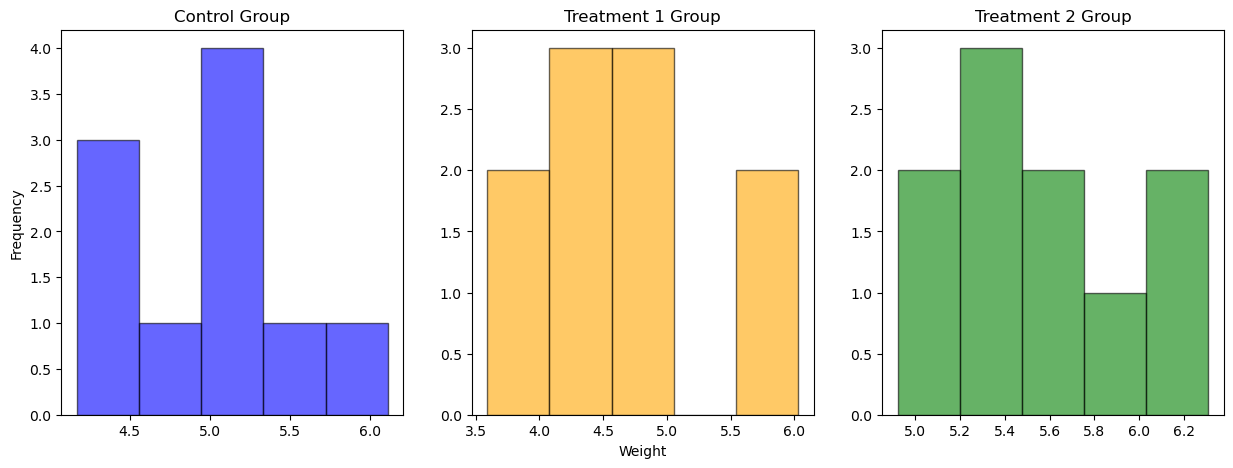

In [25]:
# create histogram
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Plot a histogram for each group
ax[0].hist(ctrl['weight'], bins=5, color='b', alpha=0.6, edgecolor='black')
ax[1].hist(trt1['weight'], bins=5, color='orange', alpha=0.6, edgecolor='black')
ax[2].hist(trt2['weight'], bins=5, color='g', alpha=0.6, edgecolor='black')

# Add titles and labels
ax[0].set_title('Control Group')
ax[1].set_title('Treatment 1 Group')
ax[2].set_title('Treatment 2 Group')
ax[0].set_ylabel('Frequency')
ax[1].set_xlabel('Weight')
plt.show()


Before diving into the analysis of the histogram, let's consider an alternative approach to enhance our understanding. One effective method is to overlay the three histograms on top of each other. his allows us to visually compare their distributions, making it easier to identify patterns, differences, and relationships between the three categories.

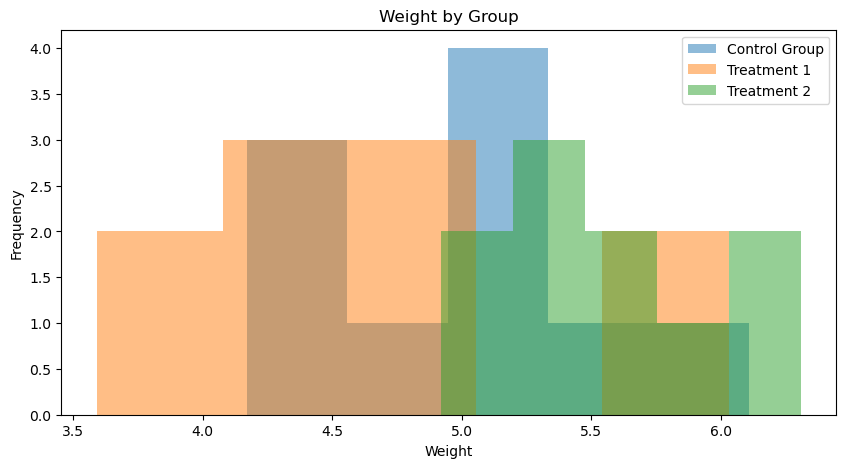

In [20]:
# Create histograms.
fig, ax = plt.subplots(figsize=(10, 5))

# Histogram of control group.
ax.hist(ctrl['weight'], bins=5, alpha=0.5, label='Control Group')

# Histogram of treatment 1 group.
ax.hist(trt1['weight'], bins=5, alpha=0.5, label='Treatment 1')

# Histogram of treatment 2 group.
ax.hist(trt2['weight'], bins=5, alpha=0.5, label='Treatment 2')

# Add a title and labels.
ax.set_title('Weight by Group')
ax.set_xlabel('Weight')
ax.set_ylabel('Frequency')

# Add a legend.
ax.legend()
plt.show()

The histogram allows us to address key questions about the data, such as identifying the central tendency, understanding the spread of the weights, and analyzing the overall shape of the distribution $^7$. From the histogram, we observe that the control group exhibits a strong central tendency, with most values concentrated between 5 and 5.3. Treatment 1 shows a slightly higher degree of variability, with observations ranging from as low as 3.5 to as high as 6. In contrast, Treatment 2 has the smallest deviation, with values primarily falling between 5 and 6.2. All three groups appear to follow a roughly normal distribution, although the control group is slightly left-skewed. There are no significant extreme outliers in the data.

### References

$^1$ Dobson, A. J. (1983). "*An Introduction to Statistical Modelling*". Chapman and Hall, Third Edition (2008), pp. 40

$^2$ Geeks for Geeks (2024). "*Pandas Read CSV in Python*". [Geeks for Geeks](https://www.geeksforgeeks.org/python-read-csv-using-pandas-read_csv/)

$^3$ pandas documentation (n.d.). "*pandas documentation*". [Pandas](https://pandas.pydata.org/docs/index.html)

$^4$ Jain N. (2024). "*Understanding the data and variables — Statistics*". [Medium](https://medium.com/@Niki_Data_n_AI/understanding-the-data-and-variables-statistics-148ba3d11857)

$^5$ Bobbitt Z. (2023). "*Pandas: How to Use describe() with Specific Percentiles*". [Statology](https://www.statology.org/pandas-describe-percentiles/)

$^6$ Velez A. (2021). "*differences between histograms and bar charts*". [Storytelling with Data](https://www.storytellingwithdata.com/blog/2021/1/28/histograms-and-bar-charts)

$^7$ LabXchange (2021). "*How to Interpret Histograms*". [LabXchange](https://www.labxchange.org/library/items/lb:LabXchange:10d3270e:html:1)

***
End